# Linear regression with one variable, implemented by numpy

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

## LOAD DATASET 

In the following data
- X = number of claims
- Y = total payment for all the claims in thousands of Swedish Kronor

for geographical zones in Sweden Reference: Swedish Committee on Analysis of Risk Premium in Motor Insurance

dataset from -  http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html

In [3]:
df = pd.read_csv("./slr06.csv")
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [4]:
raw_X = df["X"].values.reshape(-1, 1)
y = df["Y"].values

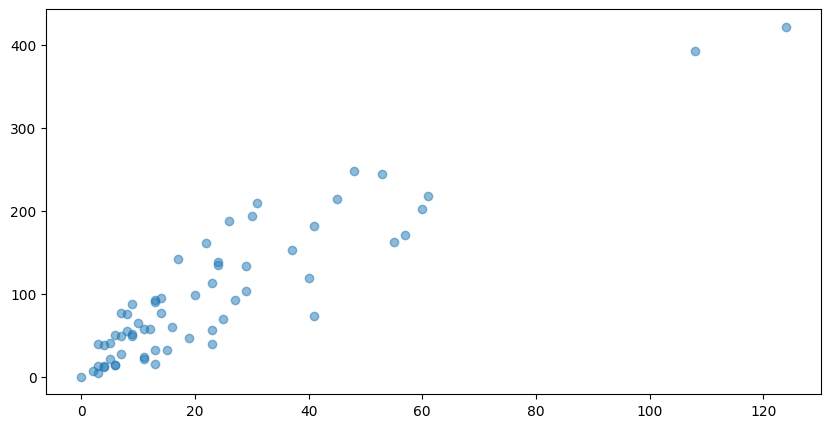

In [6]:
plt.figure(figsize=(10,5))
plt.plot(raw_X,y, 'o', alpha=0.5)

In [7]:
raw_X[:5], y[:5]

(array([[108],
        [ 19],
        [ 13],
        [124],
        [ 40]]),
 array([392.5,  46.2,  15.7, 422.2, 119.4]))

In [8]:
np.ones((len(raw_X),1))[:3]

array([[1.],
       [1.],
       [1.]])

In [9]:
X = np.concatenate( (np.ones((len(raw_X),1)), raw_X ), axis=1)
X[:5]

array([[  1., 108.],
       [  1.,  19.],
       [  1.,  13.],
       [  1., 124.],
       [  1.,  40.]])

In [10]:
w = np.random.normal((2,1)) 
# w = np.array([5,3])
w

array([1.8415117, 1.9562679])

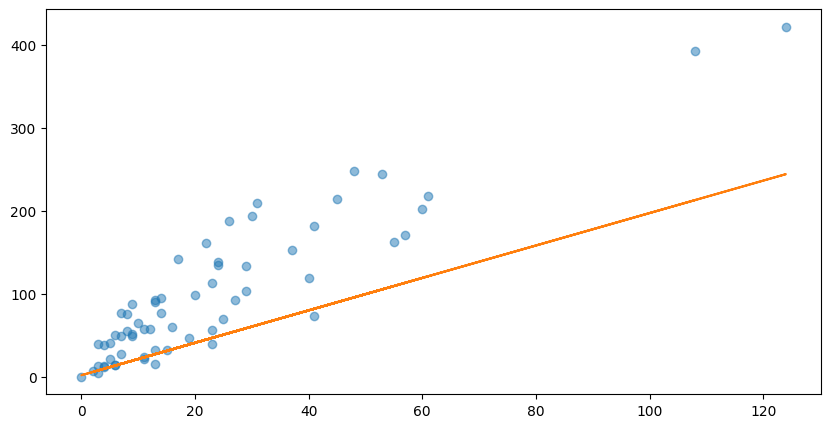

In [11]:
plt.figure(figsize=(10,5))
y_predict = np.dot(X, w)
plt.plot(raw_X,y,"o", alpha=0.5)
plt.plot(raw_X,y_predict)


## HYPOTHESIS AND COST FUNCTION

In [12]:
def hypothesis_function(X, theta):
    return X.dot(theta)

In [13]:
h = hypothesis_function(X,w)

In [14]:
def cost_function(h, y):
    return (1/(2*len(y))) * np.sum((h-y)**2)

In [15]:
h = hypothesis_function(X,w)
cost_function(h, y)

2523.5066490138283

## GRADIENT DESCENT

In [16]:
def gradient_descent(X, y, w, alpha, iterations):
    theta = w
    m = len(y)
    
    theta_list = [theta.tolist()]
    cost = cost_function(hypothesis_function(X, theta), y)
    cost_list = [cost]

    for i in range(iterations):
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        t1 = theta[1] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])
        theta = np.array([t0, t1])
        
        if i % 10== 0:
            theta_list.append(theta.tolist())
            cost = cost_function(hypothesis_function(X, theta), y)
            cost_list.append(cost)


    return theta, theta_list, cost_list

## DO Linear regression with GD

In [17]:
iterations = 10000
alpha = 0.001

theta, theta_list, cost_list = gradient_descent(X, y, w, alpha, iterations)
cost = cost_function(hypothesis_function(X, theta), y)

print("theta:", theta)
print('cost:', cost_function(hypothesis_function(X, theta), y))

theta: [19.87904103  3.41631629]
cost: 625.3743343290166


In [18]:
theta_list[:10]

[[1.8415117008991553, 1.956267897566887],
 [1.8930496403698591, 3.9189404486205834],
 [1.981878614346906, 3.8027584646598553],
 [2.0727132821324172, 3.800797128770683],
 [2.163089885363178, 3.798845683581626],
 [2.253010733984732, 3.79690407921539],
 [2.342478126293945, 3.7949722660462943],
 [2.43149434899774, 3.793050194698915],
 [2.5200616772715487, 3.7911378160468177],
 [2.60818237481746, 3.7892350812113067]]

In [19]:
theta_list = np.array(theta_list)

In [20]:
cost_list[:5]

[2523.5066490138283,
 715.1657570057023,
 707.4038935906221,
 706.578622090963,
 705.7616530261586]

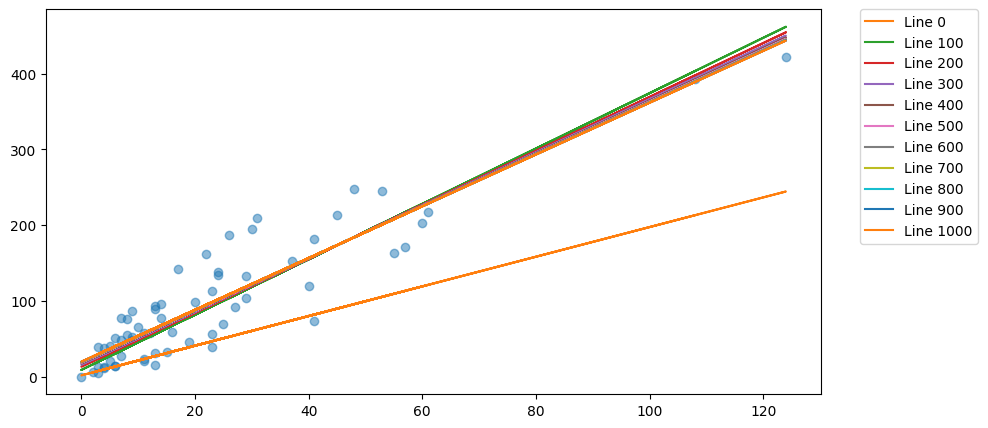

In [21]:
plt.figure(figsize=(10,5))

y_predict_step= np.dot(X, theta_list.transpose())

y_predict_step
plt.plot(raw_X,y,"o", alpha=0.5)
for i in range (0,len(cost_list),100):
    plt.plot(raw_X,y_predict_step[:,i], label='Line %d'%i)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

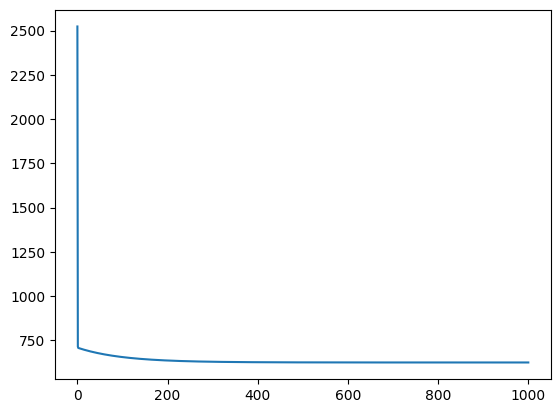

In [22]:
plt.plot(range(len(cost_list)), cost_list);


In [23]:
th0 = theta_list[:,0]
th1 = theta_list[:,1]
TH0, TH1 = np.meshgrid(th0, th1)



In [24]:
Js = np.array([cost_function(y, hypothesis_function(X, [th0, th1])) for th0, th1 in zip(np.ravel(TH0), np.ravel(TH1))])
Js = Js.reshape(TH0.shape)

<a list of 8 text.Text objects>

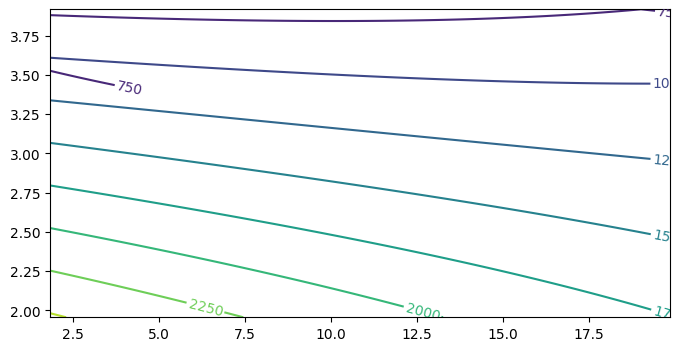

In [25]:
plt.figure(figsize=(8,4))
CS = plt.contour(TH0, TH1, Js)
plt.clabel(CS, inline=True, fontsize=10,inline_spacing=2)

In [26]:
from mpl_toolkits.mplot3d import Axes3D

ms = np.linspace(theta[0] - 15 , theta[0] + 15, 100)
bs = np.linspace(theta[1] - 15 , theta[1] + 15, 100)

M, B = np.meshgrid(ms, bs)

zs = np.array([ cost_function(y, hypothesis_function(X, theta))
    for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

/var/folders/cy/sw8s66dd02l8b9dj7pqk2ljm0000gn/T/ipykernel_22883/2907565628.py:5: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(M, B, Z, 10, color='b', alpha=0.5, offset=0, stride=30)


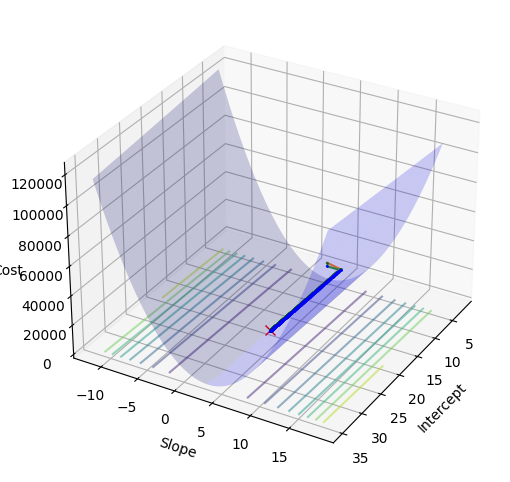

In [27]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
ax.contour(M, B, Z, 10, color='b', alpha=0.5, offset=0, stride=30)


ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Cost') 
ax.view_init(elev=30., azim=30)
ax.plot([theta[0]], [theta[1]], [cost_list[-1]] , markerfacecolor='r', markeredgecolor='r', marker='x', markersize=7);

ax.plot(theta_list[:,0], theta_list[:,1], cost_list, markerfacecolor='g', markeredgecolor='g', marker='o', 
                markersize=1);
ax.plot(theta_list[:,0], theta_list[:,1], 0 , markerfacecolor='b', markeredgecolor='b', marker='.', markersize=2);